# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span>
    
## Contexto do Negócio

A previsão de renda está intrinsecamente ligada à análise de crédito e riscos financeiros. Empresas precisam determinar com precisão a capacidade de um cliente pagar por empréstimos, financiamentos ou outras transações que dependam de estabilidade financeira. Portanto, o sucesso do modelo preditivo pode:

- **Reduzir o risco financeiro:** Ajudar instituições a evitar clientes inadimplentes.
- **Aumentar a eficiência:** Automatizar a análise de crédito, agilizando processos.
- **Expandir o mercado:** Oferecer crédito a novos clientes com base em estimativas mais precisas.

---

### Objetivo do Projeto

1. **Identificar as variáveis mais correlacionadas com a renda:**
   - A análise de correlação será usada para destacar quais fatores possuem maior impacto na previsão de renda. Isso pode incluir dados demográficos (idade, escolaridade, localização), perfil de trabalho (setor, tempo de experiência) ou outros fatores relacionados.

2. **Analisar o comportamento das variáveis-chave:**
   - Vamos explorar como essas variáveis se distribuem e interagem entre si e com a renda. Isso inclui a detecção de padrões, possíveis outliers e relações não lineares.

3. **Construir um modelo preditivo eficiente:**
   - Usando as variáveis selecionadas, será desenvolvido um modelo de aprendizado de máquina capaz de prever a renda com alta precisão. Modelos como regressão linear, árvores de decisão ou até redes neurais podem ser utilizados, dependendo da complexidade dos dados.

4. **Gerar insights para tomada de decisão:**
   - Além de prever a renda, o modelo deve fornecer informações úteis para os tomadores de decisão, como quais variáveis possuem mais impacto e como otimizar políticas de crédito com base nos resultados.

---

### Por que esta etapa é importante?

Antes de qualquer análise ou modelagem, é essencial entender **o que o negócio quer resolver** e **por que isso importa**. No caso da previsão de renda:

- **Alinhamento com os objetivos do negócio:** Ao explorar as variáveis corretas, garantimos que o modelo não só seja tecnicamente preciso, mas também relevante para o contexto de crédito.
- **Definição de sucesso:** Clarificar que o objetivo final não é apenas prever a renda, mas sim melhorar a eficiência e a assertividade nas análises financeiras.
- **Evitar perda de tempo:** Uma boa definição inicial economiza esforço com variáveis ou métodos que não agregam valor.
</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span>A etapa de **Entendimento dos Dados** é essencial para garantir que possuímos as informações corretas para resolver o problema definido na etapa anterior. Nesta fase, exploramos o dataset inicial para identificar padrões, inconsistências, outliers e entender a qualidade geral dos dados. Essa análise inicial orientará as etapas posteriores de preparação e modelagem.</span>


### Dicionário de dados

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência                                 | Object|
| id_cliente              |  Código cliente                                     | Int64|
| sexo                    |  Sexo                                               | Object|
| posse_de_veiculo        |  Possuí veículo                                     | Bool|
| posse_de_imovel         |  Possuí Imóvel                                      | Bool|
| qtd_filhos              |  Quantidade de filhos                               | Int64|
| tipo_renda              |  Tipo de renda                                      | Object|
| educacao                |  Escolaridade                                       | Object|
| estado_civil            |  Estado Civil                                       | Object|
| tipo_residencia         |  Tipo de residência                                 | Object|
| idade                   |  Idade                                              | Int64|
| tempo_emprego           |  Tempo no emprego                                   | Float64|
| qt_pessoas_residencia   |  Quantidade de pessoas na residência                | Float64|
| renda                   |  Renda                                              | Float64|
| faixa_etaria            |  Faixa etária                                       | Category|
| tempo_emprego_anos      |  Tempo do emprego em anos                           | Float64|




#### Carregando os pacotes
Estes serão os pacotes a serem utilizados.

In [287]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [289]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
renda.drop(labels='Unnamed: 0', axis = 1, inplace=True)
renda.head(1)

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.60274,1.0,8060.34


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

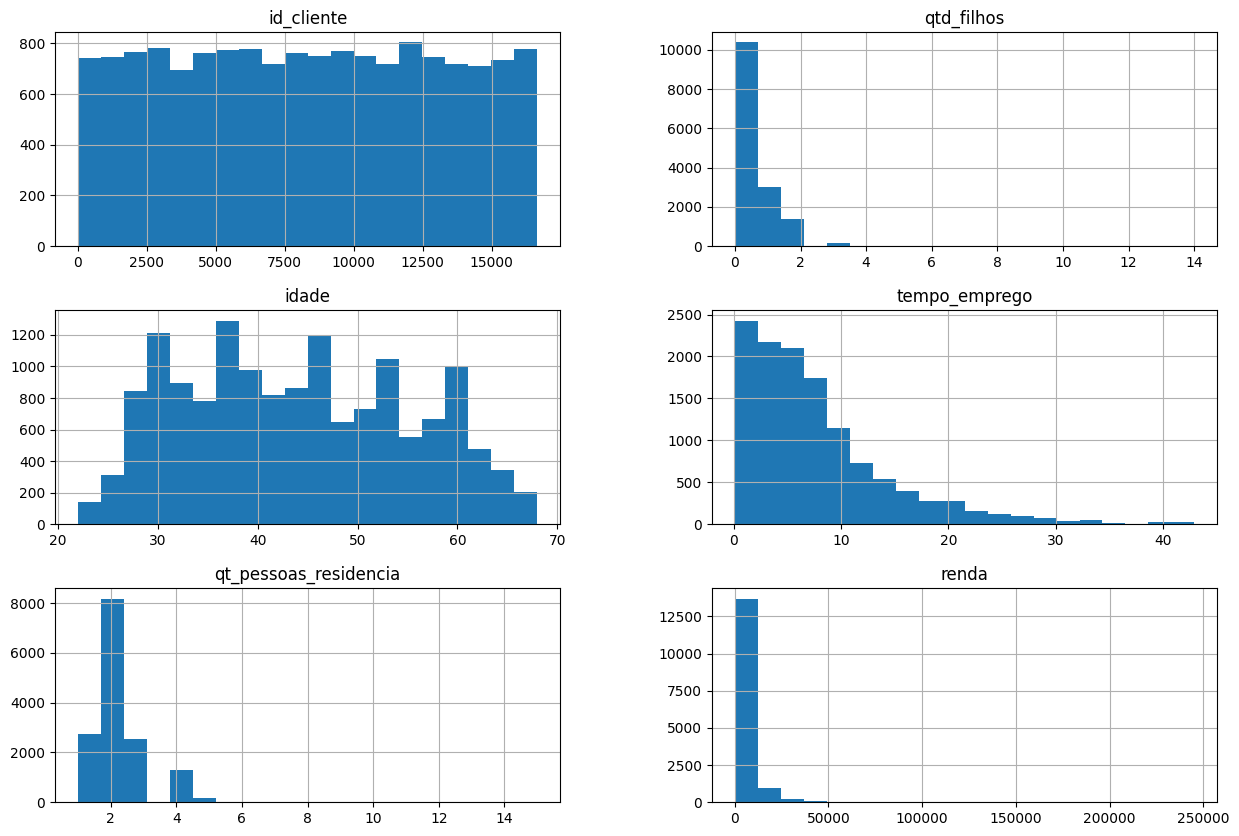

In [291]:
# Garantir que a pasta 'output' existe
if not os.path.exists('output'):
    os.makedirs('output')

# Histograma para todas as variáveis numéricas
renda.hist(bins=20, figsize=(15, 10))
# Salvar a figura
plt.savefig('output/histograma_variaveis_numericas.png')
plt.show()

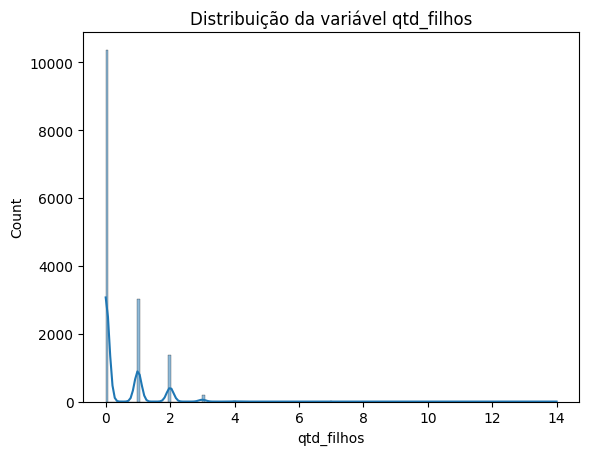

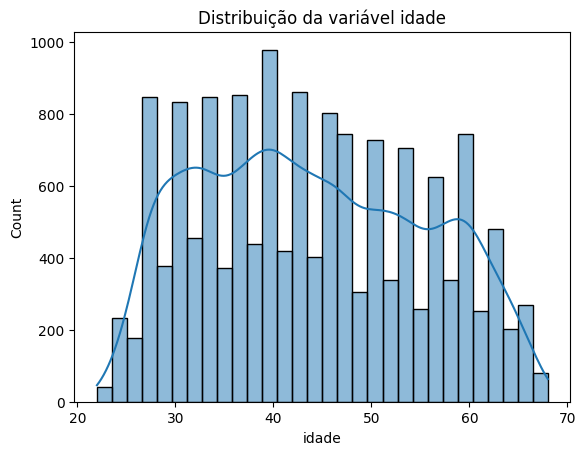

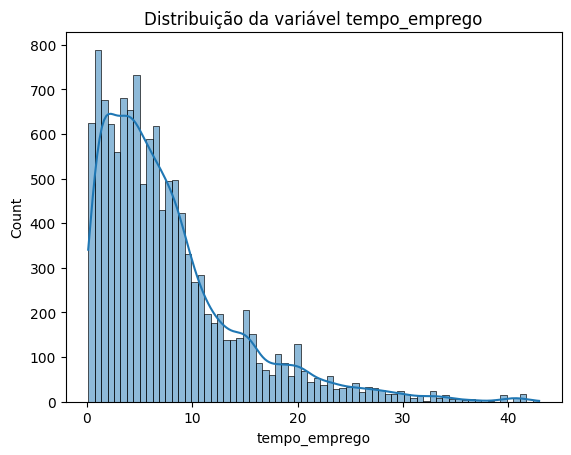

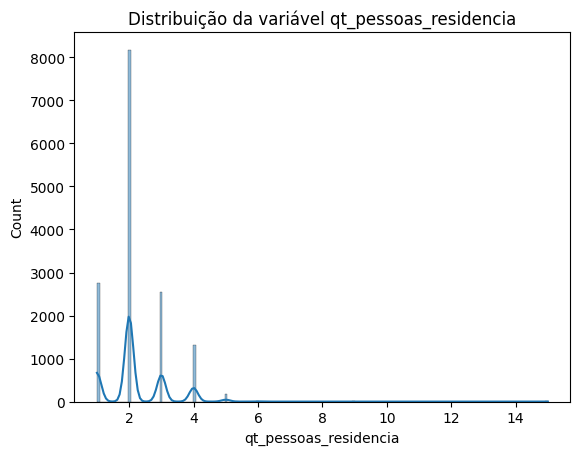

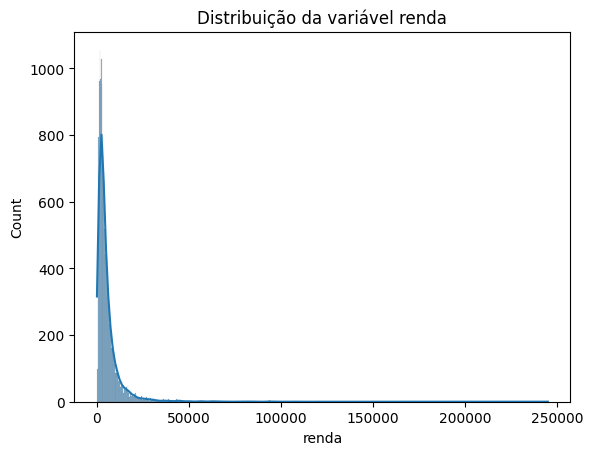

In [357]:
for column in renda.select_dtypes(include=['float64', 'int64']).drop(columns=['id_cliente']).columns:
    sns.histplot(renda[column], kde=True)
    plt.title(f"Distribuição da variável {column}")
    plt.savefig('output/distribuicao_variaveis_numericas.png')
    plt.show()

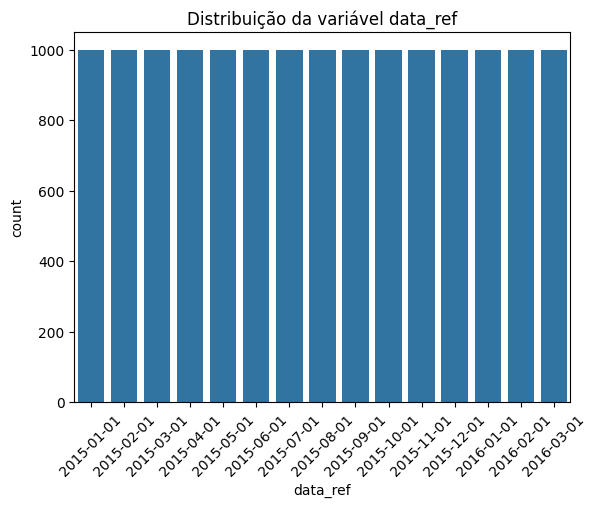

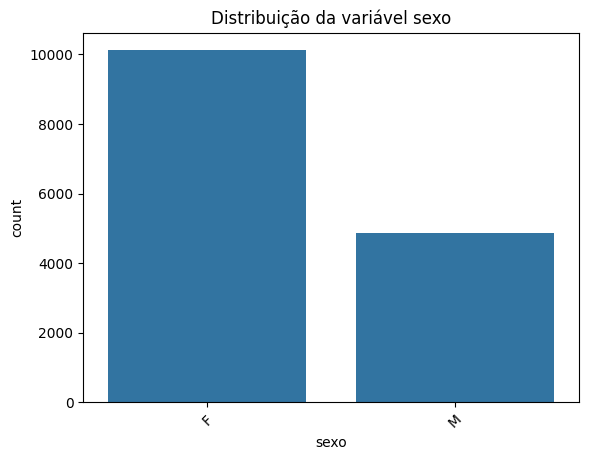

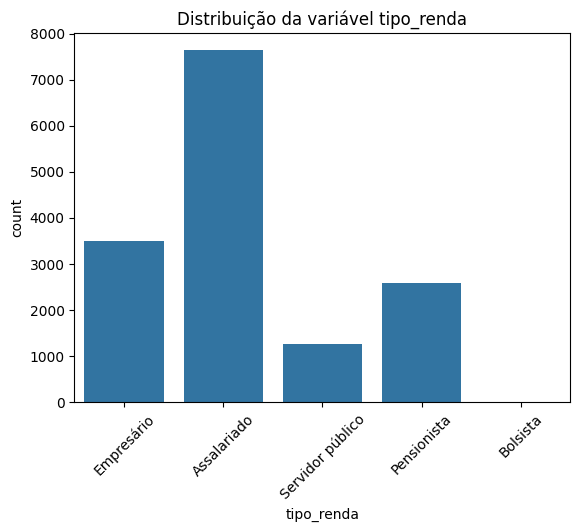

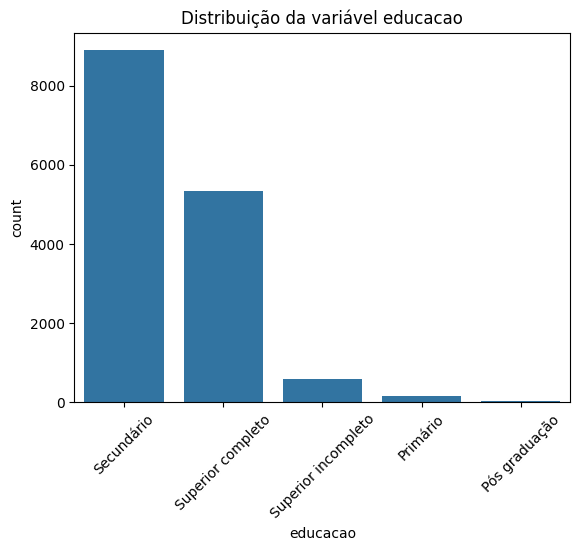

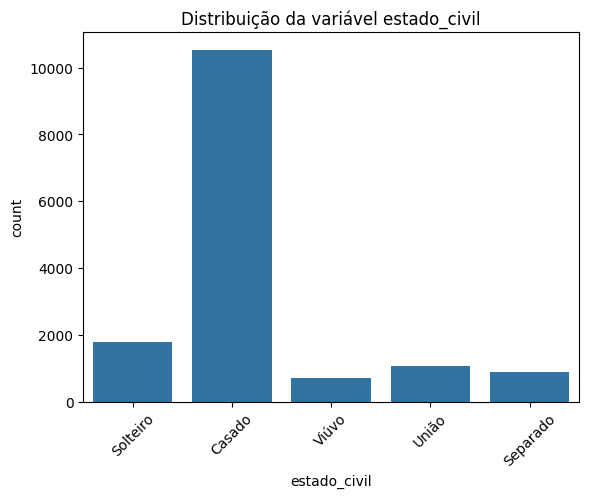

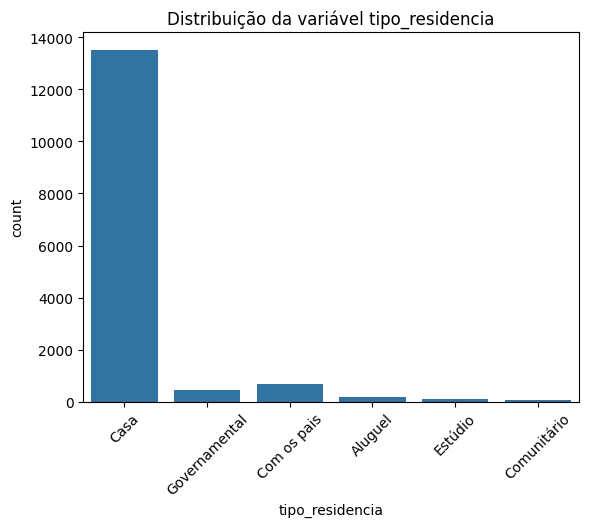

In [359]:
# Gráficos de barras para variáveis categóricas
for column in renda.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=renda[column])
    plt.title(f"Distribuição da variável {column}")
    plt.xticks(rotation=45)
    plt.savefig('output/distribuicao_variaveis_categoricas.png')
    plt.show()

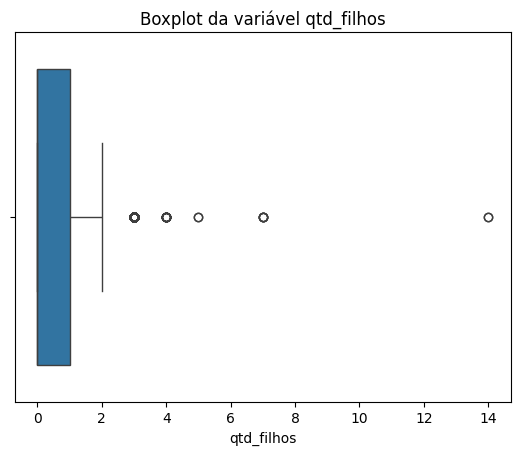

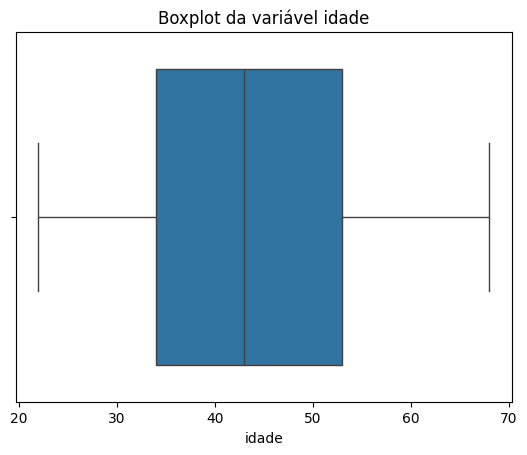

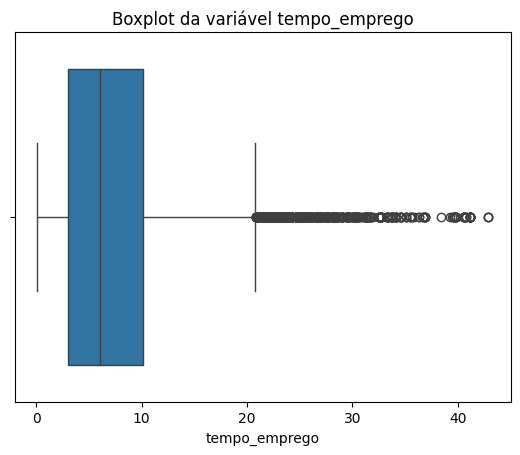

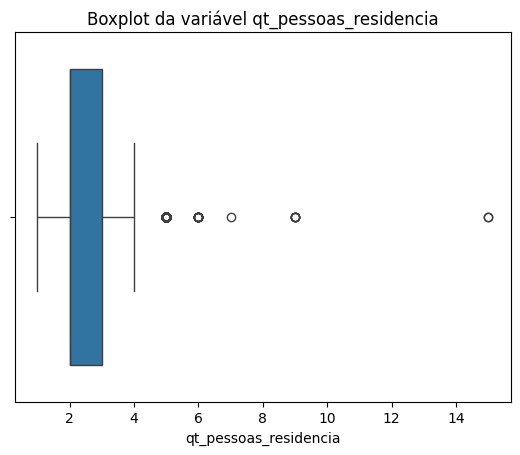

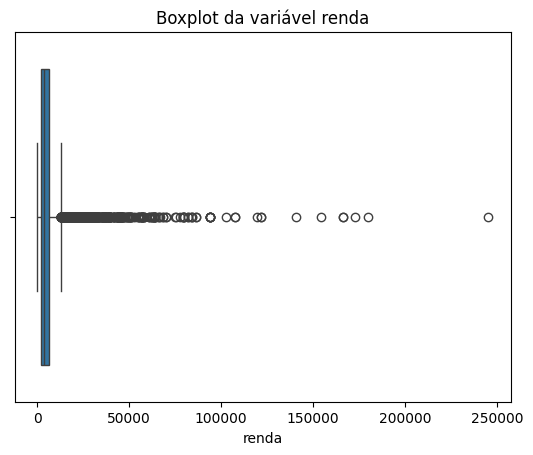

In [294]:
# Boxplots para variáveis numéricas
for column in renda.select_dtypes(include=['float64', 'int64']).drop(columns=['id_cliente']).columns:
    sns.boxplot(x=renda[column])
    plt.title(f"Boxplot da variável {column}")
    plt.savefig('output/boxplot_variaveis_categoricas.png')
    plt.show()

### Entendimento dos dados - Bivariadas




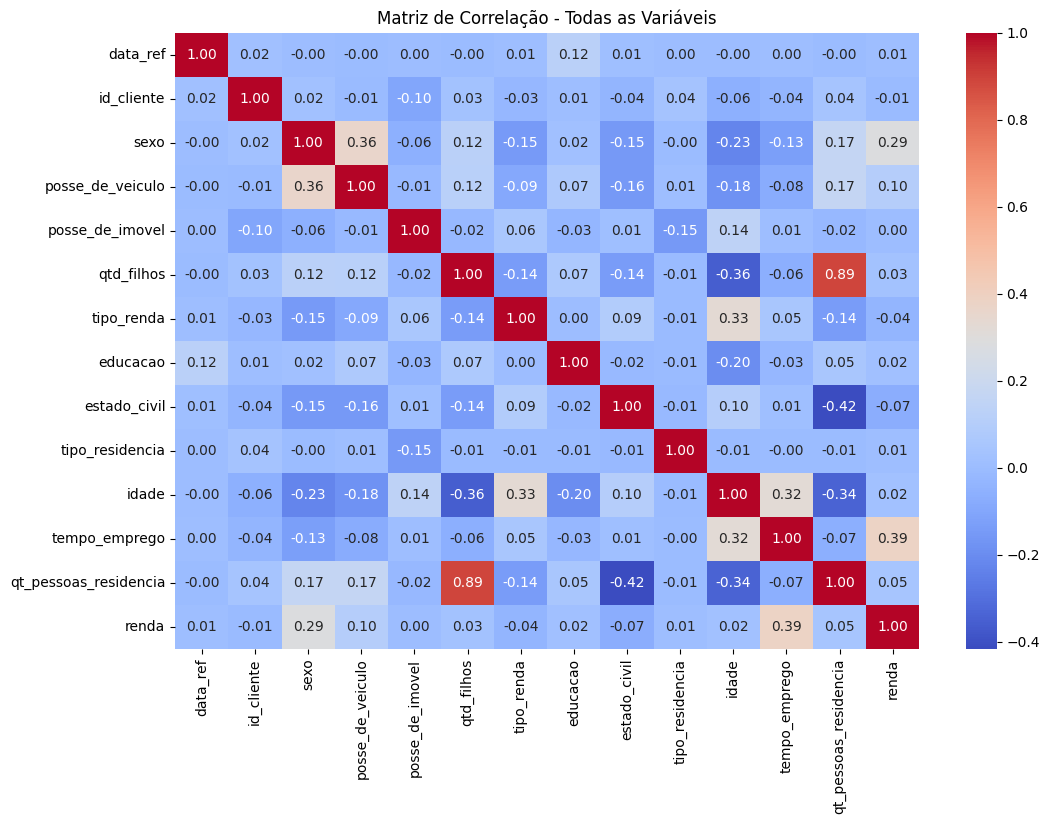

In [361]:
# Criar uma cópia do dataset para preservá-lo
encoded_data = renda.copy()

# Codificar variáveis categóricas
for column in encoded_data.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column])

# Agora todas as variáveis (numéricas e categóricas codificadas) podem ser analisadas
# Calcular a matriz de correlação
correlation_matrix = encoded_data.corr()

# Visualizar a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Todas as Variáveis')
plt.savefig('output/heatmap_geral.png')
plt.show()

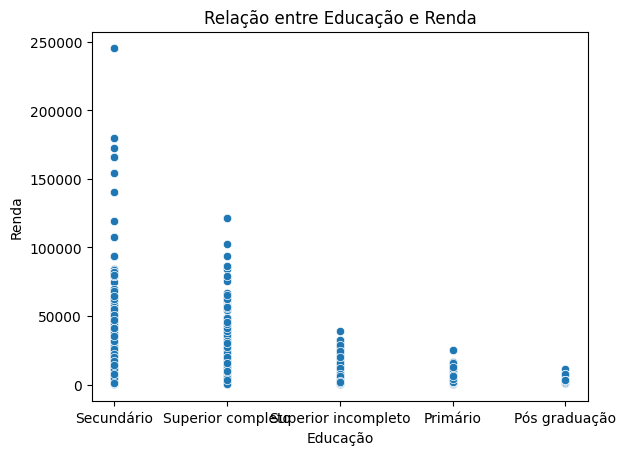

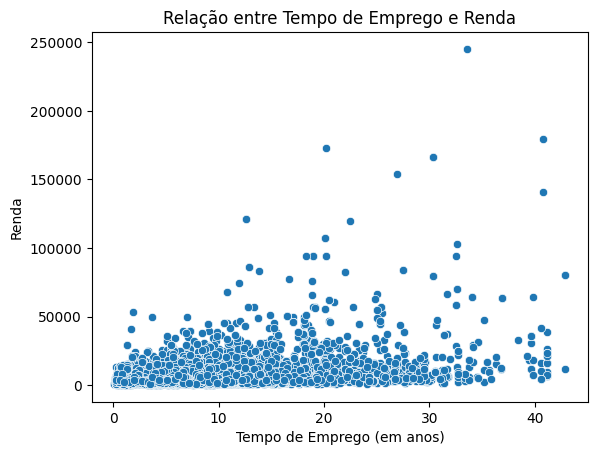

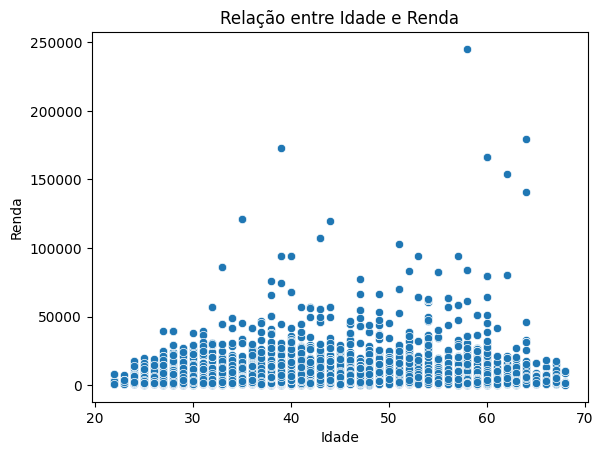

In [363]:
# Gráfico de dispersão entre educação e renda
sns.scatterplot(x=renda['educacao'], y=renda['renda'])
plt.title('Relação entre Educação e Renda')
plt.xlabel('Educação')
plt.ylabel('Renda')
plt.savefig('output/dispersao_educacaoXrenda.png')
plt.show()

# Gráfico de dispersão entre tempo de emprego e renda
sns.scatterplot(x=renda['tempo_emprego'], y=renda['renda'])
plt.title('Relação entre Tempo de Emprego e Renda')
plt.xlabel('Tempo de Emprego (em anos)')
plt.ylabel('Renda')
plt.savefig('output/dispersao_tempoEmpXrenda.png')
plt.show()

# Gráfico de dispersão entre idade e renda
sns.scatterplot(x=renda['idade'], y=renda['renda'])
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.savefig('output/dispersao_idadeXrenda.png')
plt.show()

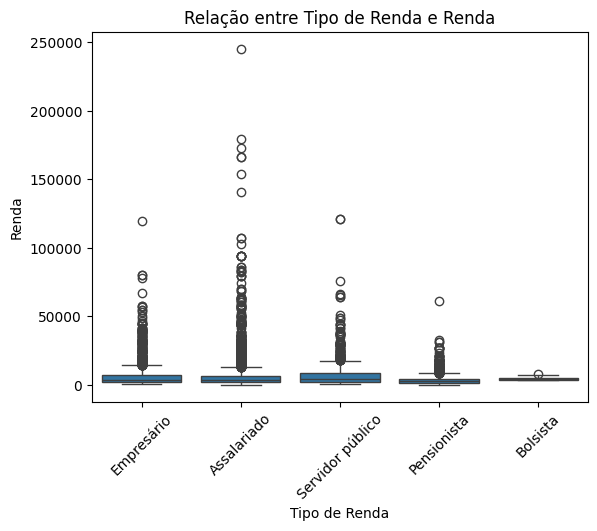

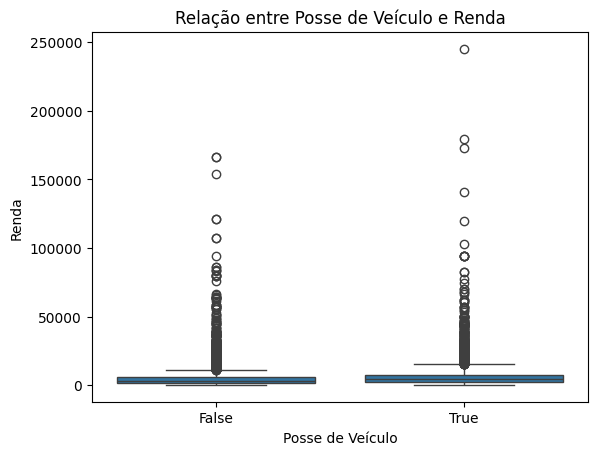

In [365]:
# Boxplot para visualizar a distribuição de renda por tipo de renda
sns.boxplot(x=renda['tipo_renda'], y=renda['renda'])
plt.title('Relação entre Tipo de Renda e Renda')
plt.xlabel('Tipo de Renda')
plt.ylabel('Renda')
plt.xticks(rotation=45)
plt.savefig('output/distribuicao_rendaXtipo_renda.png')
plt.show()

# Boxplot para visualizar a distribuição de renda por posse de veículo
sns.boxplot(x=renda['posse_de_veiculo'], y=renda['renda'])
plt.title('Relação entre Posse de Veículo e Renda')
plt.xlabel('Posse de Veículo')
plt.ylabel('Renda')
plt.savefig('output/distribuicao_rendaXposseVeiculo.png')
plt.show()

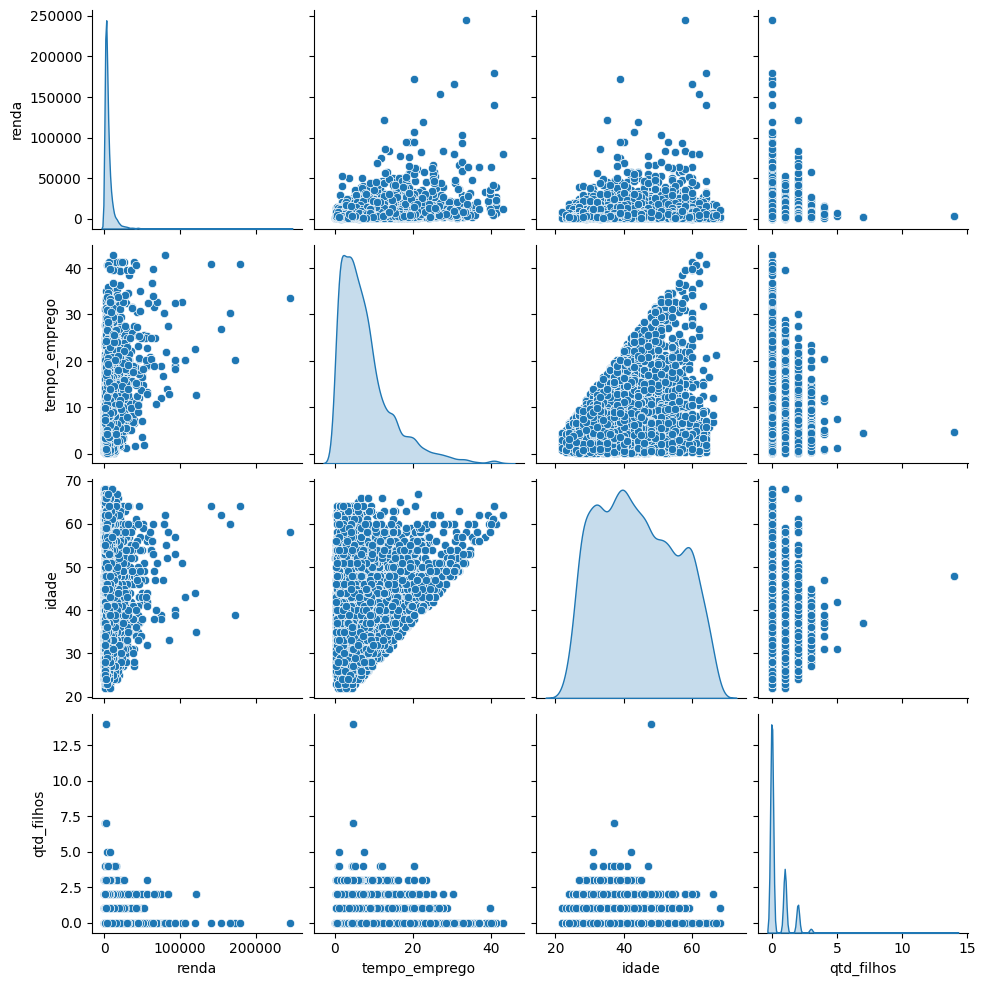

In [300]:
# Selecionar as variáveis de interesse
selected_columns = ['renda', 'educacao', 'tempo_emprego', 'idade', 'qtd_filhos']

# Pairplot para explorar as relações entre as variáveis
sns.pairplot(renda[selected_columns], diag_kind='kde')
plt.savefig('output/pairplot_variaveis_interesse.png')
plt.show()

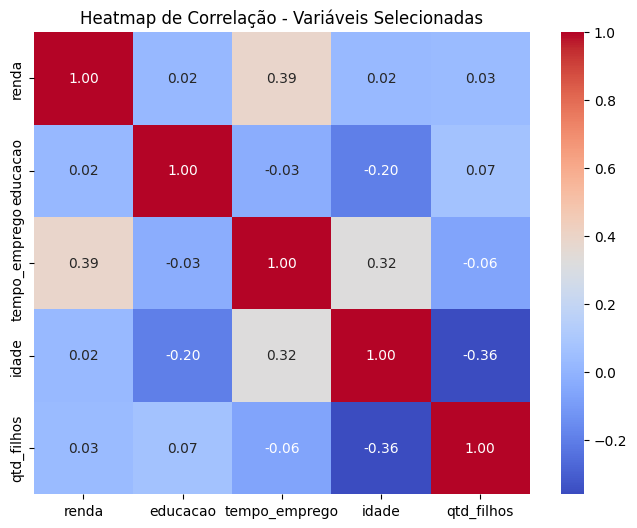

In [367]:
# Criar uma matriz de correlação filtrada
filtered_corr = encoded_data[['renda', 'educacao', 'tempo_emprego', 'idade', 'qtd_filhos']].corr()

# Heatmap das variáveis selecionadas
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap de Correlação - Variáveis Selecionadas')
plt.savefig('output/heatmap_variaveis_selecionadas.png')
plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [304]:
# Selecionar apenas as colunas relevantes para análise
renda_selecionada = renda[['renda', 'educacao', 'tempo_emprego', 'idade', 'qtd_filhos', 'tipo_renda']]

In [305]:
# Verificar valores nulos em cada coluna
print(renda_selecionada.isnull().sum())

renda               0
educacao            0
tempo_emprego    2573
idade               0
qtd_filhos          0
tipo_renda          0
dtype: int64


In [355]:
renda_selecionada['tempo_emprego'] = renda_selecionada['tempo_emprego'].fillna(renda_selecionada['tempo_emprego'].median())

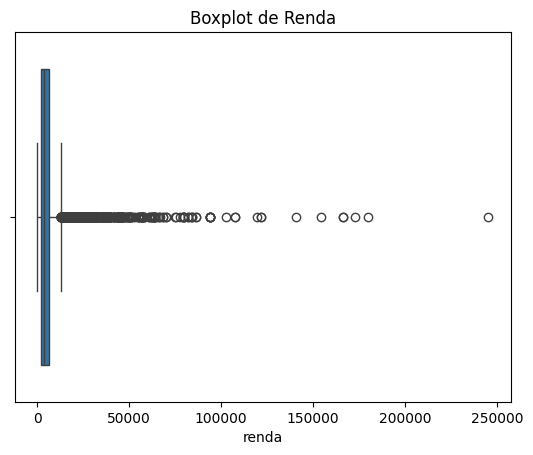

In [307]:
# Boxplot para identificar outliers
sns.boxplot(x=renda_selecionada['renda'])
plt.title('Boxplot de Renda')
plt.show()

In [308]:
# Remover outliers acima de 99%
limite_superior = renda_selecionada['renda'].quantile(0.99)
renda_selecionada = renda_selecionada[renda_selecionada['renda'] <= limite_superior]

In [309]:
# Criar categorias de idade
bins = [0, 18, 30, 45, 60, 100]
labels = ['Jovem', 'Adulto Jovem', 'Adulto', 'Meia Idade', 'Idoso']
renda_selecionada['faixa_etaria'] = pd.cut(renda_selecionada['idade'], bins=bins, labels=labels)

In [310]:
# Transformar tempo de emprego em anos completos
renda_selecionada['tempo_emprego_anos'] = renda_selecionada['tempo_emprego'] / 12

In [311]:
# Verificar tipos de dados
print(renda_selecionada.dtypes)

renda                  float64
educacao                object
tempo_emprego          float64
idade                    int64
qtd_filhos               int64
tipo_renda              object
faixa_etaria          category
tempo_emprego_anos     float64
dtype: object


In [312]:
# Converter variáveis categóricas
categorical_columns = renda_selecionada.select_dtypes(include=['object']).columns
for col in categorical_columns:
    renda_selecionada[col] = renda_selecionada[col].astype('category').cat.codes

In [313]:
renda_selecionada.head()

,renda,educacao,tempo_emprego,idade,qtd_filhos,tipo_renda,faixa_etaria,tempo_emprego_anos
0,8060.34,2,6.602740,26,0,2,Adulto Jovem,0.550228
1,1852.15,3,7.183562,28,0,0,Adulto Jovem,0.598630
2,2253.89,3,0.838356,35,0,2,Adulto,0.069863
3,6600.77,3,4.846575,30,1,4,Adulto Jovem,0.403881
4,6475.97,2,4.293151,33,0,0,Adulto,0.357763


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


In [316]:
# Separar as variáveis explicativas (X) e a variável-alvo (y)
X = renda_selecionada.drop(columns=['renda'])
y = renda_selecionada['renda']

# Dividir em treinamento (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Criar dummies para faixa_etaria
X_train = pd.get_dummies(X_train, columns=['faixa_etaria'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['faixa_etaria'], drop_first=True)

print(f"Tamanho do conjunto de treinamento: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treinamento: (11881, 10)
Tamanho do conjunto de teste: (2971, 10)


### Rodando o modelo


In [318]:
print(X_train.dtypes)
print(X_train.isnull().sum())


educacao                        int8
tempo_emprego                float64
idade                          int64
qtd_filhos                     int64
tipo_renda                      int8
tempo_emprego_anos           float64
faixa_etaria_Adulto Jovem       bool
faixa_etaria_Adulto             bool
faixa_etaria_Meia Idade         bool
faixa_etaria_Idoso              bool
dtype: object
educacao                     0
tempo_emprego                0
idade                        0
qtd_filhos                   0
tipo_renda                   0
tempo_emprego_anos           0
faixa_etaria_Adulto Jovem    0
faixa_etaria_Adulto          0
faixa_etaria_Meia Idade      0
faixa_etaria_Idoso           0
dtype: int64


In [319]:
# Construir o modelo de regressão linear
modelo_linear = LinearRegression()

# Treinar o modelo
modelo_linear.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_linear = modelo_linear.predict(X_test)

In [320]:
# Construir o modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)

# Treinar o modelo
modelo_rf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = modelo_rf.predict(X_test)

In [321]:
# Avaliar o modelo de regressão linear
r2 = r2_score(y_test, y_pred_linear)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae = mean_absolute_error(y_test, y_pred_linear)

print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.15
RMSE: 4882.51
MAE: 3217.43


In [322]:
# Avaliar o modelo de Random Forest
r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae = mean_absolute_error(y_test, y_pred_rf)

print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.37
RMSE: 4203.31
MAE: 2597.37


## Etapa 5 Crisp-DM: Avaliação dos resultados


### Análise dos Resultados

### 1. Regressão Linear
- **R²: 0.15**
  - O modelo conseguiu explicar apenas **15% da variância da renda**. Isso indica que ele tem uma capacidade limitada de capturar as relações entre as variáveis explicativas e a renda.
- **RMSE: 4882.51** e **MAE: 3217.43**
  - O erro médio é alto, indicando que o modelo frequentemente prevê valores que estão muito distantes dos reais.
- **Conclusão:** A Regressão Linear não parece ser um bom modelo para este problema, possivelmente porque ele assume relações lineares entre as variáveis, e a renda pode ter dependências mais complexas.

---

### 2. Random Forest
- **R²: 0.37**
  - O modelo conseguiu explicar **37% da variância da renda**, mais do que o dobro do que a Regressão Linear. Embora ainda não seja ideal, é um desempenho significativamente melhor.
- **RMSE: 4203.31** e **MAE: 2597.37**
  - Os erros são consideravelmente menores do que os da Regressão Linear, indicando que o Random Forest consegue prever valores mais próximos dos reais.
- **Conclusão:** O Random Forest é uma escolha mais adequada para este problema, pois captura melhor as relações não lineares entre as variáveis.